In [1]:
import pickle 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Import models
*Import pretrained models if exist.*

In [3]:
with open(r"trained_models\1_logistic_reg_v1.pkl", 'rb') as m: 
    log_reg = pickle.load(m)
with open(r"trained_models\1_logistic_reg_v2.pkl", 'rb') as m: 
    log_reg_v2 = pickle.load(m)
with open(r"trained_models\1_linear_reg_v1.pkl", 'rb') as m: 
    lin_reg = pickle.load(m)
with open(r"trained_models\1_linear_svc_v1.pkl", 'rb') as m: 
    lin_svc = pickle.load(m)
with open(r"trained_models\1_SGD_classifier_v1.pkl", 'rb') as m: 
    sgdc = pickle.load(m)
with open(r"trained_models\1_SGD_classifier_v2.pkl", 'rb') as m: 
    sgdc_v2 = pickle.load(m)
with open(r"trained_models\1_decision_tree_classifier_v1.pkl", 'rb') as m: 
    dtc = pickle.load(m)
with open(r"trained_models\1_random_forest_classifier_v1.pkl", 'rb') as m: 
    rfc = pickle.load(m)
with open(r"trained_models\1_random_forest_classifier_v2.pkl", 'rb') as m: 
    rfc_v2 = pickle.load(m)
with open(r"trained_models\1_Gaussian_NB_v1.pkl", 'rb') as m: 
    gnb = pickle.load(m)

# Final preparation

In [4]:
data = pd.read_csv(r'..\\clean_data\final_data_v2.csv', index_col=0)
data.head()

,day_datetime,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_solarradiation,day_solarenergy,...,Рівне,Суми,Тернопіль,Ужгород,Харків,Херсон,Хмельницький,Черкаси,Чернівці,Чернігів
hour_datetimeEpoch,,,,,,,,,,,,,,,,,,,,,
1645653600,2022-02-24,4.9,0.7,2.6,0.0,83.7,0.118,4.17,36.9,2.8,...,0,0,0,0,0,0,0,0,0,0
1645657200,2022-02-24,4.9,0.7,2.6,0.0,83.7,0.118,4.17,36.9,2.8,...,0,0,0,0,0,0,0,0,0,0
1645660800,2022-02-24,4.9,0.7,2.6,0.0,83.7,0.118,4.17,36.9,2.8,...,0,0,0,0,0,0,0,0,0,0
1645664400,2022-02-24,4.9,0.7,2.6,0.0,83.7,0.118,4.17,36.9,2.8,...,0,0,0,0,0,0,0,0,0,0
1645668000,2022-02-24,4.9,0.7,2.6,0.0,83.7,0.118,4.17,36.9,2.8,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data.fillna(0, inplace=True)

In [6]:
data = data.drop(["day_datetime", "date", "hour_datetime"], axis = 1)

# Split data and train models:
 1) *Logistic regression*
 2) *Linear regression*
 3) *SGD classifier*
 4) *Linear SVC*
 5) *Decision tree classifier*
 6) *Random forest classifier* 
 7) *Gaussian NB*

In [7]:
class Model:
    def __init__(self, df: pd.DataFrame):
        self.__data = df
        self.__model = None
        self.X_train: pd.DataFrame
        self.y_train: pd.DataFrame  
        self.X_test: pd.DataFrame
        self.y_test: pd.DataFrame 
    def set_model(self, model):
        self.__model = model
    def get_model(self):
        return self.__model
    def get_train(self):
         return self.X_train, self.y_train
    def get_test(self):
        return self.X_test, self.y_test
    def get_score(self):
        return self.__model.score(self.X_train, self.y_train)
    def data_split(self, method=TimeSeriesSplit(n_splits=5), scaler=StandardScaler()):
        """!!! SPLITTING FOR DATA IS ADAPTED ONLY TO TimeSeriesSplit METHOD.
        IT DOES NOT GUARANTEE COMPATABILITY WITH OTHER SPLITTING METHODS !!!"""
        X = self.__data.drop("is_alarm", axis = 1)
        y = self.__data["is_alarm"]
        scaled_data = scaler.fit_transform(X)
        X = pd.DataFrame(scaled_data, index=X.index, columns=X.columns)
        for train_index, test_index in method.split(X):
            self.X_train, self.X_test = X.iloc[train_index], X.iloc[test_index]
            self.y_train, self.y_test = y.iloc[train_index], y.iloc[test_index]
    def train(self, model):
        model.fit(self.X_train, self.y_train)
        self.__model = model
    def save_model(self, pass_to, name):
        with open(f"{pass_to}\\{name}.pkl", "wb") as model:
            pickle.dump(self.__model, model)

In [8]:
model = Model(data)
model.data_split()

### 1) Logistic regression

In [9]:
# model.train(LogisticRegression(max_iter=1000))
# model.save_model("trained_models", "logistic_regression_name")

### 2) Linear regression

In [10]:
# model.train(LinearRegression())
# model.save_model("trained_models", "linear_regression_name")

### 3) SGD сlassifier

In [11]:
# model.train(SGDClassifier())
# model.save_model("trained_models", "SGD_classifier_name")

### 4) Linear SVC

In [12]:
# model.train(LinearSVC())
# model.save_model("trained_models", "linear_svc_name")

### 5) Decision tree classifier

In [13]:
# model.train(DecisionTreeClassifier(criterion="entropy"))
# model.save_model("trained_models", "DTC_name")

### 6) Random forest classifier

In [14]:
# model.train(RandomForestClassifier(max_depth=20))
# model.save_model("trained_models", "RFC_name")

### 7) Gaussian NB

In [15]:
# model.train(GaussianNB())
# model.save_model("trained_models", "Gaussian_NB")

# Classification reports and mertics analysis:
1) *Classification report for each trained model.*
2) *Top 20 features in dataset by correlation.*

In [16]:
def display_metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)
    if y_pred.dtype != int:
        y_pred = (1 / (1 + np.exp(-y_pred))).round()
    cm_list =  confusion_matrix(y_test, y_pred)
    fig = plt.figure()
    cm_plot = sns.heatmap(cm_list, annot=True, cmap="viridis", fmt=".10g")
    cm_plot.set_xlabel("Predicted values")
    cm_plot.set_ylabel("Actual values")
    plt.show()
    """
    fig = cm_plot.get_figure()
    fig.savefig("your_file_name.png")
    """
    report = classification_report(y_test, y_pred)
    print(report)

In [17]:
def display_multiple_metrics(models_dict, X_test, y_test):
    amount = len(models_dict)
    rows, cols = round(amount/2), 2
    keys = list(models_dict.keys())
    fig, ax = plt.subplots(rows, cols, figsize=(12, rows*6))
    plot_on = lambda row, col, axes: axes[col] if rows == 1 else axes[row][col]
    for i in range(rows):
        for j in range(cols):
            if i*cols+j == amount:
                break
            y_pred = models_dict[keys[i*cols+j]].predict(X_test)
            if y_pred.dtype != int:
                y_pred = (1 / (1 + np.exp(-y_pred))).round()
            cm_list =  confusion_matrix(y_test, y_pred)
            cm_plot = sns.heatmap(cm_list, annot=True, cmap="viridis", fmt=".10g", ax=plot_on(i, j, ax))
            cm_plot.set_title(keys[i*cols+j])
            cm_plot.set_xlabel("Predicted values")
            cm_plot.set_ylabel("Actual values")
            report = classification_report(y_test, y_pred)
            plot_on(i, j, ax).text(0, 3.7, report, ma="right")
    plt.subplots_adjust(hspace=1)
    plt.show()
#     fig.get_figure().savefig("train_reports.png")
    

In [18]:
model_names = ["Logistic regression", "Linear regression", "SGD classifier", "Linear SVC",
              "Decision tree classifier", "Random forest classifier", "Gaussian NB"]
models = [log_reg, lin_reg, sgdc, lin_svc, dtc, rfc, gnb]
models_dict = dict(zip(model_names, models))

### Train report

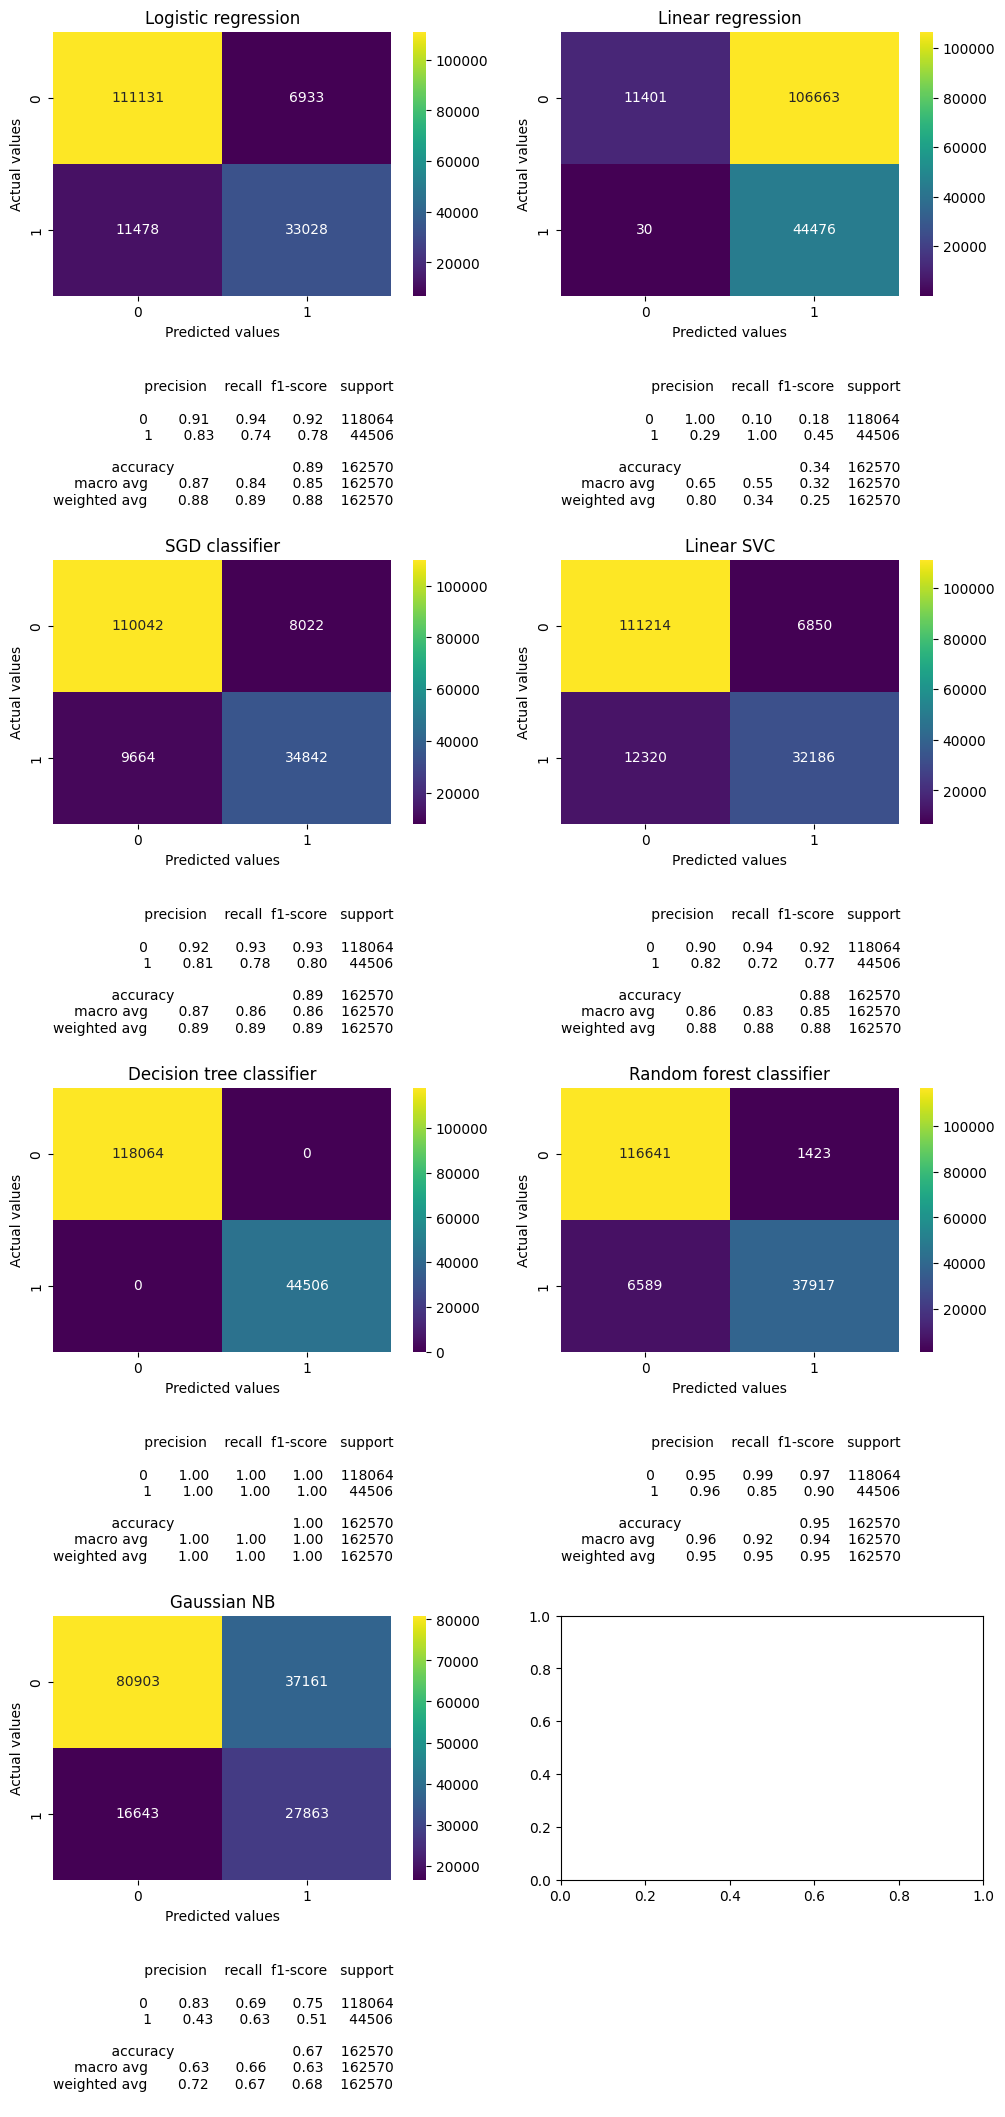

In [19]:
display_multiple_metrics(models_dict, *model.get_train())

### Test report

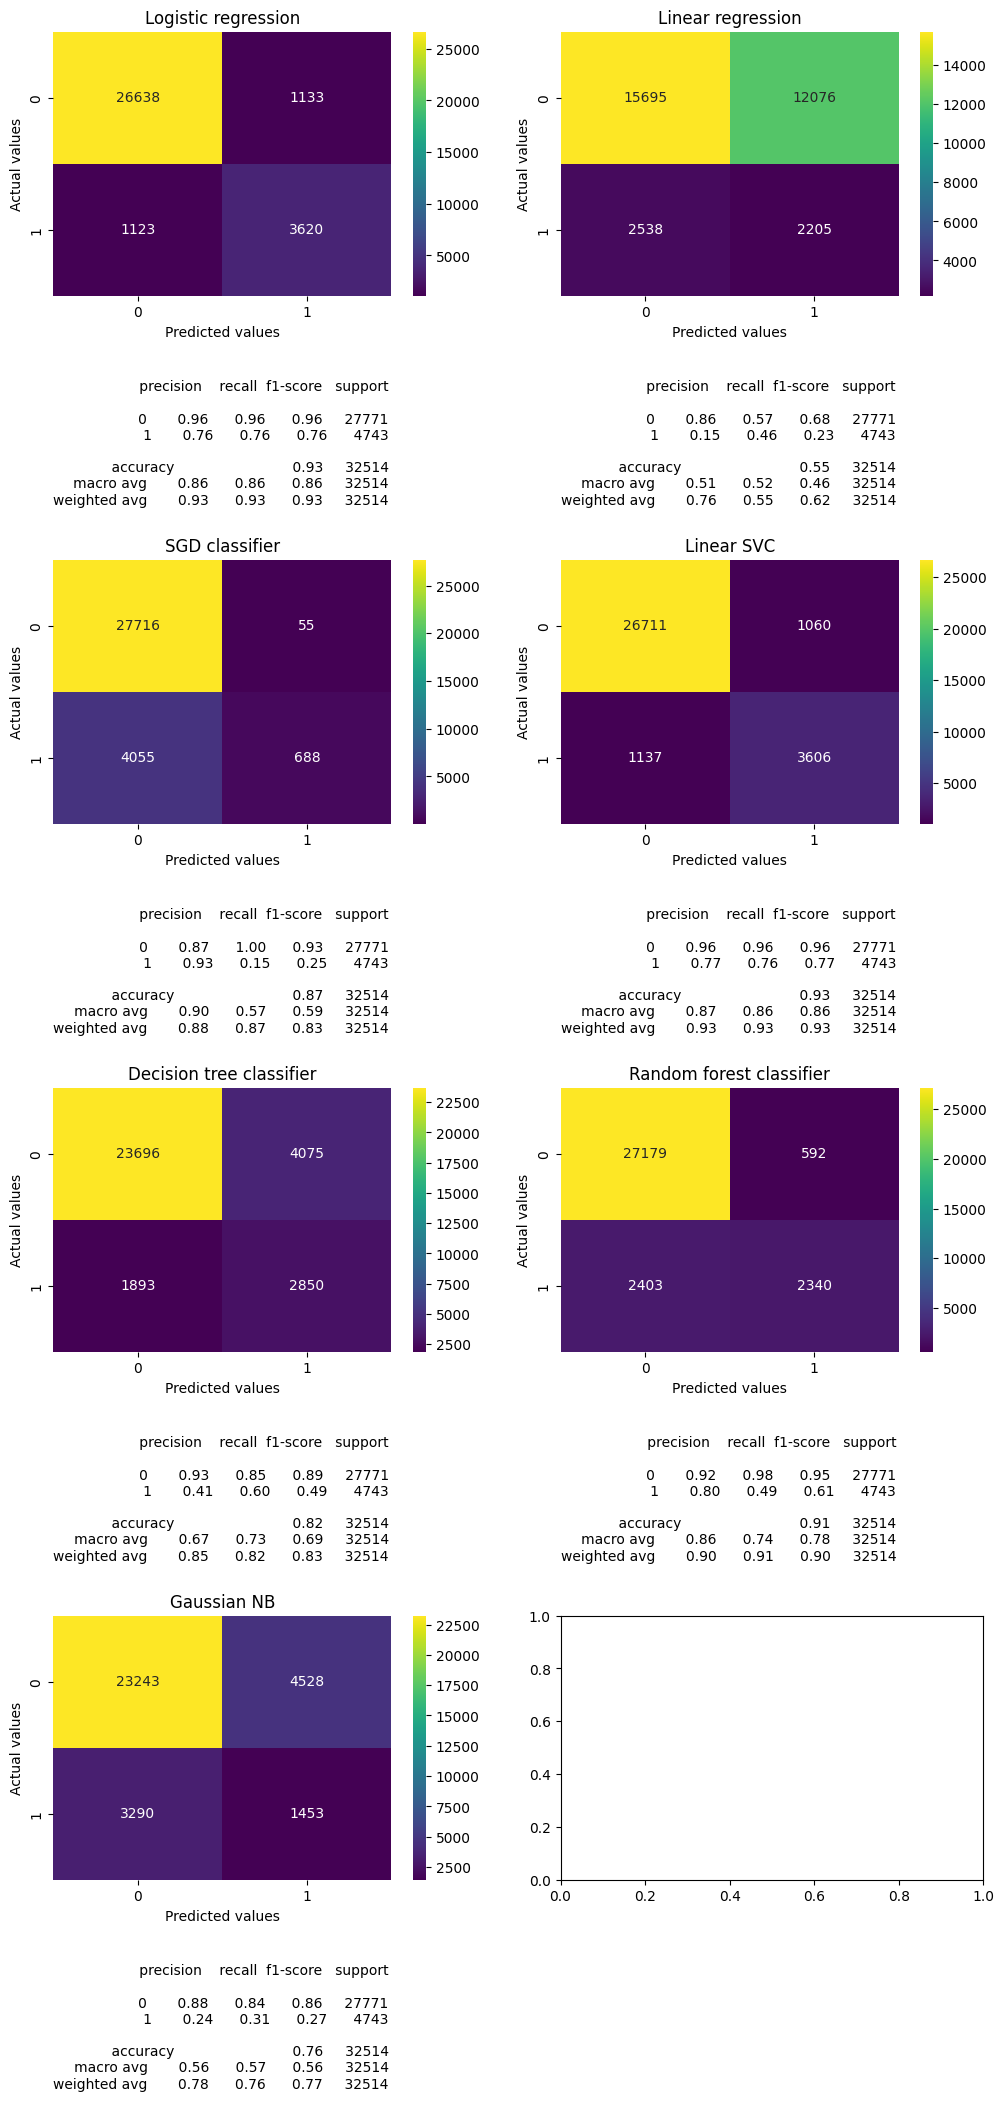

In [20]:
display_multiple_metrics(models_dict, *model.get_test())

### Correlation matrix

In [21]:
corr_matrix = data.corr()

<AxesSubplot:>

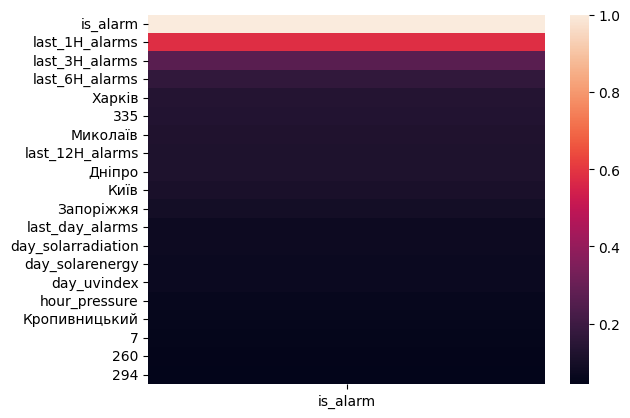

In [22]:
sns.heatmap(pd.DataFrame(corr_matrix["is_alarm"]).sort_values("is_alarm", ascending=False)[:20])

# Tuning hyperparameters

We will tune hyperparameters for top 3 trained models:
1) *Logistic regression.*
2) *SGD classifier.*
3) *Random forest classifier.*
***
<b>NOTE</b>: *Linear SVC* generally performs the same as logistic regression for our classification. The one of two models was chosen.<br>
*Decision tree classifier* is simpler version of *random forest classifier* which tends to be overfitting. So the last model was chosen.  

In [23]:
def get_results(grid):
    print("Best score: ", grid.best_score_, 
          "\nBest params: ", grid.best_params_)

### 1) Logistic regression

In [24]:
# log_params = [{'C': [0.001, 0.01, 0.1, 1, 10]}]
# log_grid = GridSearchCV(LogisticRegression(), log_params, scoring="accuracy", cv=TimeSeriesSplit(n_splits=5))
# model.train(log_grid)
# get_results(model.get_model())

*Best score:*  0.8728842959955712 <br>
*Best params:*  {'C': 0.01}

In [25]:
# model.train(LogisticRegression(C=0.01))
# model.save_model("trained_models", "1_logistic_reg_v2")

### 2) SGD classifier 

In [26]:
# sgd_params = [{'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0]}]
# sgd_grid = GridSearchCV(SGDClassifier(), sgd_params, scoring="accuracy", cv=TimeSeriesSplit(n_splits=5))
# model.train(sgd_grid)
# get_results(model.get_model())

*Best score:*  0.8386049086547335 <br>
*Best params:*  {'alpha': 0.01}

In [27]:
# model.train(SGDClassifier(alpha=0.01))
# model.save_model("trained_models", "1_SGD_classifier_v2")

### 3) Random forest classifier

In [28]:
# rf_params = [{"n_estimators": [100, 200, 300, 500], "max_depth": [50, 75, 100], 
#               "min_samples_split": [2, 5, 8, 10]}]
# rf_grid = GridSearchCV(RandomForestClassifier(), rf_params, scoring="accuracy", cv=TimeSeriesSplit(n_splits=5))
# model.train(rf_grid)
# get_results(model.get_model())

*Best score:*  0.8531537183982284<br> 
*Best params:*  {'max_depth': 100, 'min_samples_split': 10, 'n_estimators': 200}

In [29]:
# model.train(RandomForestClassifier(n_estimators=200, max_depth=100, min_samples_split=10))
# model.save_model("trained_models", "1_random_forest_classifier_v2")

# Final models evaluation

In [30]:
final_model_names = ["Logistic regression", "SGD classifier", "Random forest classifier"]
final_models = [log_reg_v2, sgdc_v2, rfc_v2]
final_models_dict = dict(zip(final_model_names, final_models))

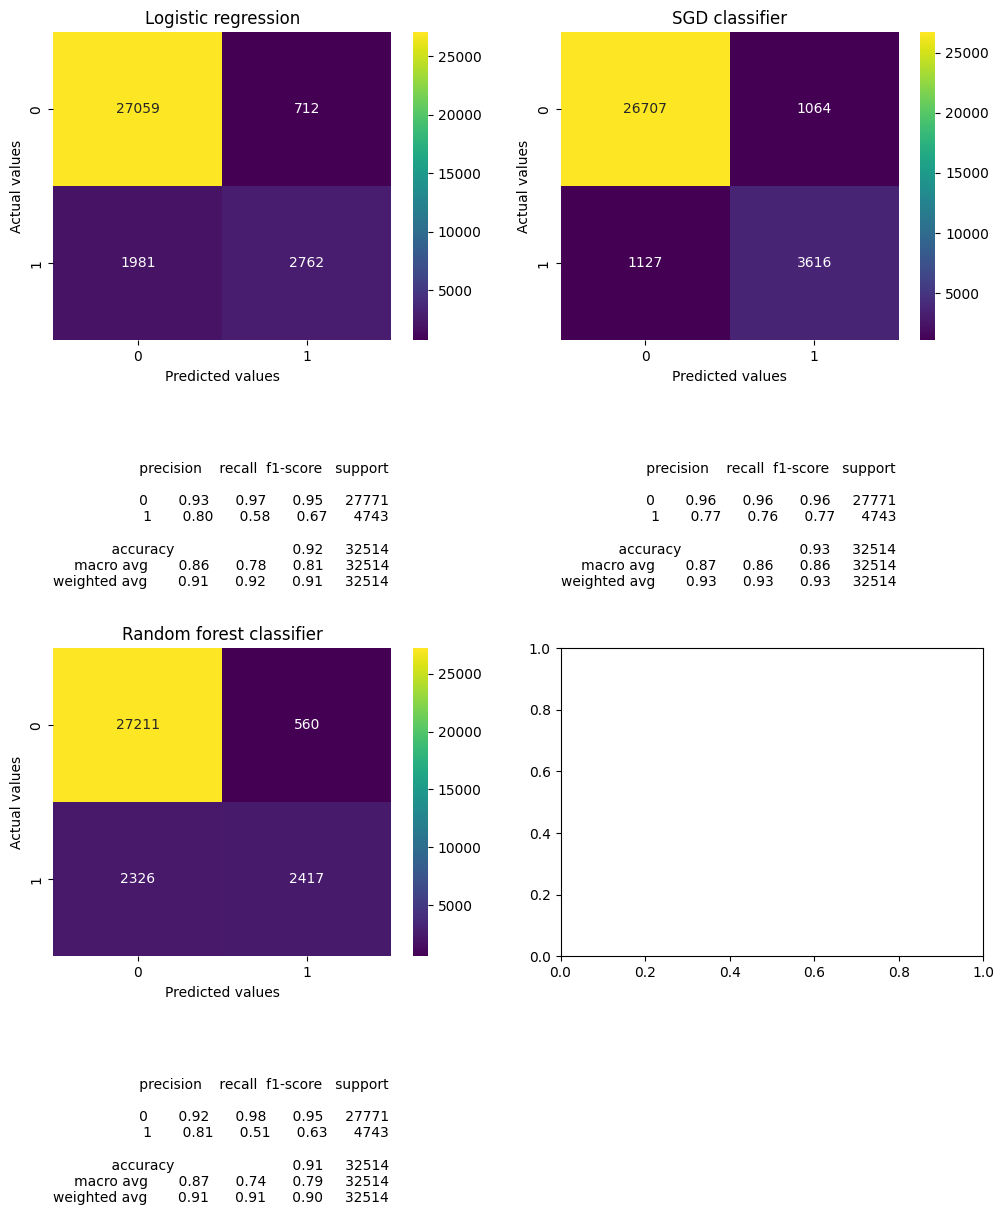

In [31]:
display_multiple_metrics(final_models_dict, *model.get_test())